In [35]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Load Data and Format Data Frame

In [89]:
data = pd.read_table('data/taxi_injury_time.txt',sep='\),', engine='python', header = None)
data = data.transpose()
data = data.iloc[1::2, :]
data = data.reset_index(drop=True)
data = data.rename(columns={0: 'AB'})
data['taxi counts'], data['injuries'] = data['AB'].str.split(',', 1).str
data['taxi counts'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['injuries'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data = data.drop('AB', 1)
data = data.astype(float)
data = data.drop(data[data['taxi counts'] > 150000].index)
# data = data.drop(data[data['taxi counts'] < 20000].index)
data

,taxi counts,injuries
0,84.0,2.0
1,1674.0,4.0
2,817.0,2.0
3,19.0,3.0
4,40.0,3.0
5,34260.0,3.0
6,1444.0,2.0
7,73985.0,2.0
8,4843.0,4.0
9,458.0,1.0


# Plot Data

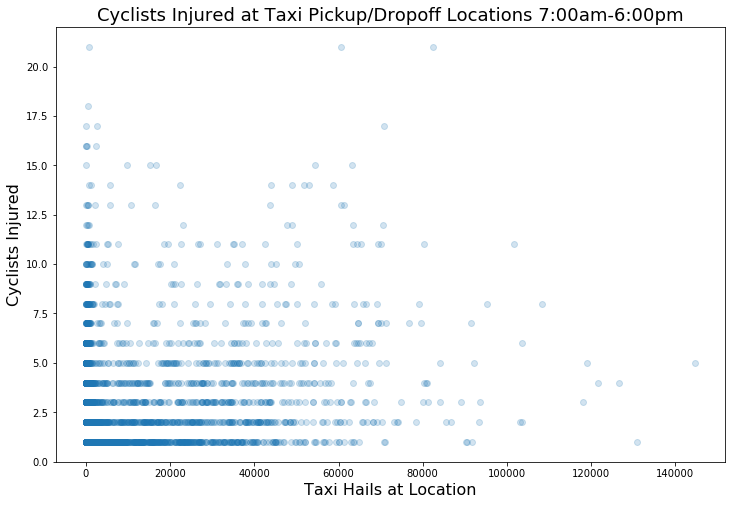

In [108]:
x = data['taxi counts']
y = data['injuries']

plt.figure(figsize=(12,8))
fit = np.polyfit(x, y, deg=1)
plt.xlabel('Taxi Hails at Location', size=16)
plt.ylabel('Cyclists Injured',size=16)
plt.scatter(x, y, alpha = '0.2')
plt.title('Cyclists Injured at Taxi Pickup/Dropoff Locations 7:00am-6:00pm',size=18)

# fig, ax = plt.subplots()
# ax.plot(x, fit[0] * x + fit[1], color='red')


In [90]:
import statsmodels.api as sm
model = sm.OLS(data['injuries'], data[['taxi counts','injuries',]])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               injuries   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.954e+33
Date:                Tue, 23 May 2017   Prob (F-statistic):               0.00
Time:                        14:33:49   Log-Likelihood:             1.8416e+05
No. Observations:                5732   AIC:                        -3.683e+05
Df Residuals:                    5730   BIC:                        -3.683e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
taxi counts  -1.44e-20   2.46e-21     -5.848      0.000     -1.92e-20 -9.57e-21
injuries        1.0000   1.27e-17    7.9e+16      0.000         1.000     1.000
==============================================================================
Omnibus:                     3490.729   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37372.756
Skew:                          -2.796   Prob(JB):                         0.00
Kurtosis:                      14.190   Cond. No.                     5.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
data.to_csv('accidents_time.csv')